In [15]:
from keras.datasets import cifar10
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
import pandas as pd
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train/255, X_test/255
y_train, y_test = y_train.flatten(), y_test.flatten()

170498071/170498071 [==============================] - 257s 2us/step


In [5]:
K = len(set(y_train))

In [16]:
i = Input(shape=X_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i, x)

In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9820 - accuracy: 0.6568 - val_loss: 1.0505 - val_accuracy: 0.6348
Epoch 2/5
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7601 - accuracy: 0.7382 - val_loss: 0.7272 - val_accuracy: 0.7536
Epoch 3/5
1563/1563 [==============================] - 75s 48ms/step - loss: 0.6440 - accuracy: 0.7780 - val_loss: 0.7500 - val_accuracy: 0.7448
Epoch 4/5
1563/1563 [==============================] - 74s 47ms/step - loss: 0.5456 - accuracy: 0.8126 - val_loss: 0.7768 - val_accuracy: 0.7422
Epoch 5/5
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4638 - accuracy: 0.8420 - val_loss: 0.6043 - val_accuracy: 0.8009


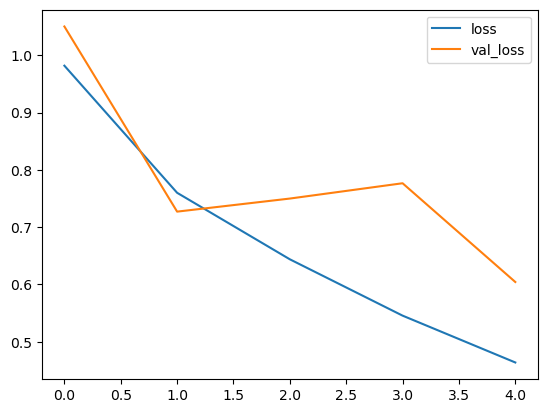

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

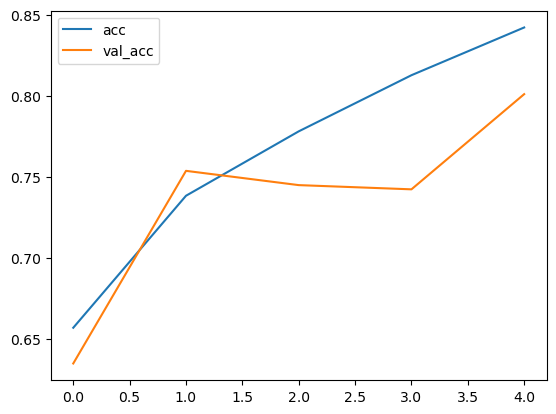

In [21]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()